---
title: "Finding Minimas and Maximas using SciPy"
author: "Kirtan Gangani"
date: "July 14, 2025" 
categories: [Python, SciPy, Data Visualisation]
format:
  html:
    toc: true
    code-fold: false
    code-copy: true
jupyter: python3
---

# Introduction

Identifying maxima and minima is a fundamental task if you are analyzing sensor readings, optimizing a machine learning model, or studying scientific phenomena. Fortunately, Python's SciPy library provides an efficient way to do that.

In this blog post, we'll dive into how to use SciPy for finding local extrema (both maximas and minimas) in respiratory force data. We will also explore how to achieve similar results with a manual approach, giving us deeper understanding of the underlying logic.

# Understanding Maximas and Minimas

Before we jump into the code, let's briefly clarify what we mean by "maxima" and "minima" in the context of data analysis.

## Maximas (Peaks)
Think of these as the "high points" or "peaks" in your data. In our Force data, a maxima would be a moment when the force measurement reaches a peak value, and then starts to decrease.

* Local Maxima: These are peaks that are higher than the immediately surrounding data points. This means a point is considered a maxima if it is strictly greater to its left and right neighbor. 

* Global Maximum: This would be the absolute highest value recorded across your entire dataset. While find_peaks identifies local peaks, you'd need an extra step (like np.max(force)) to find the global maximum.

## Minima (Valleys) 
Minima are the "low points". In our Force data, a minima would be when the force measurement dips to a low value and then starts to increase. This means a point is considered a minima if it is strictly lesser to its left and right neighbor.

* Local Minima: These are valleys that are lower than the immediately surrounding data points. 

* Global Minimum: This would be the absolute lowest value recorded across your entire dataset. Similar to the global maximum, find_peaks (when applied to -force for valleys) identifies local minima, and you'd use np.min(force) for the global minimum.


# Code

Below you will find Python code snippets demonstrating two methods for identifying maxima and minima (peaks and valleys): one leveraging SciPy's powerful signal processing library, and the other a custom, manual implementation. Both approaches yield identical results.

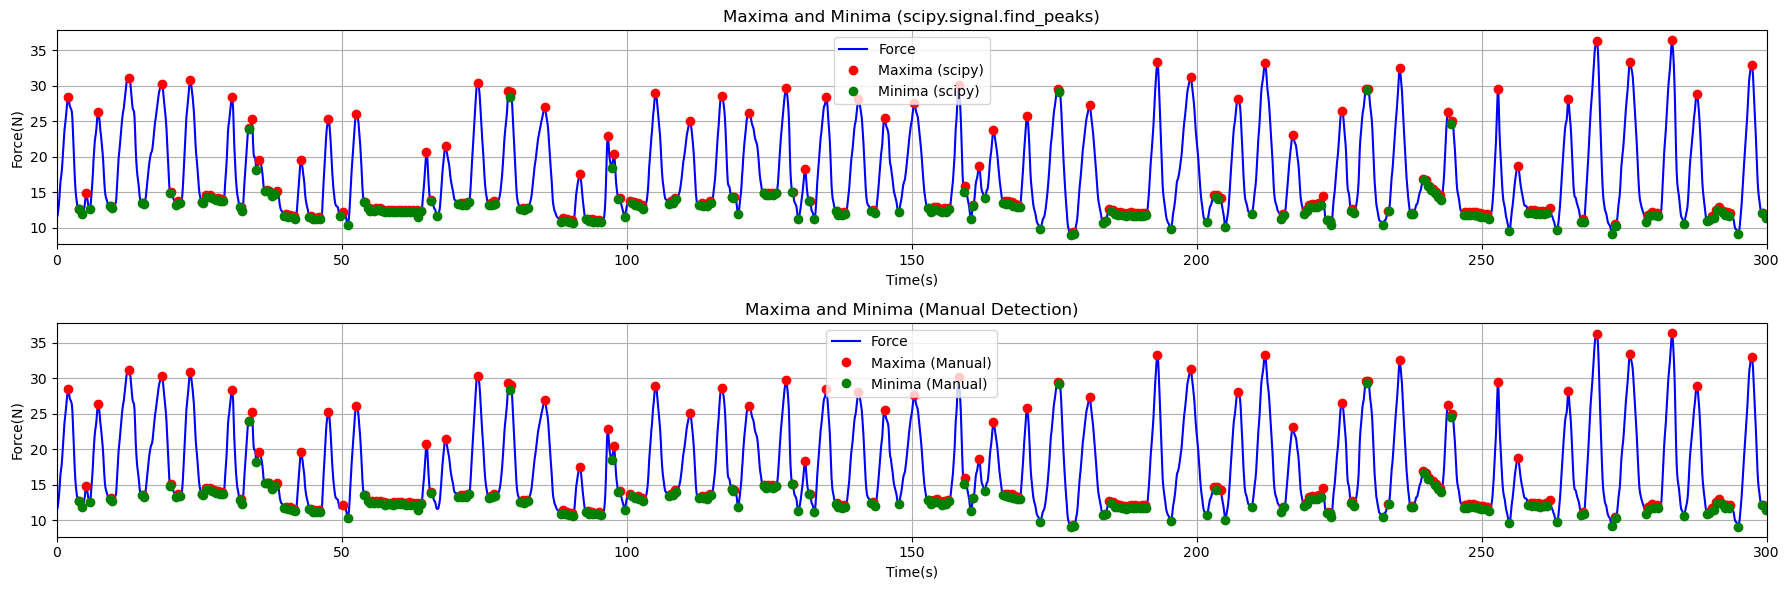

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

df = pd.read_csv(r'datasets/chest-belt.csv')

force = df['Force(N)'].values
time = df['Time(s)'].values

fig, axes = plt.subplots(2, 1, figsize=(18, 6))

peaks, _ = find_peaks(force)
valleys, _ = find_peaks(-force)

axes[0].plot(time, force, label='Force', color='blue')
axes[0].plot(time[peaks], force[peaks], "ro", label='Maxima (scipy)')
axes[0].plot(time[valleys], force[valleys], "go", label='Minima (scipy)')
axes[0].set_title('Maxima and Minima (scipy.signal.find_peaks)')
axes[0].set_xlabel('Time(s)')
axes[0].set_xlim(0, 300)
axes[0].set_ylabel('Force(N)')
axes[0].legend()
axes[0].grid(True)

maxima_manual = []
minima_manual = []

for i, j in enumerate(force):
    if i == 0 or i == len(force)-1:
        continue
    if j > force[i-1] and j > force[i+1]:
        maxima_manual.append(i)

for i, j in enumerate(force):
    if i == 0 or i == len(force)-1:
        continue
    if j < force[i-1] and j < force[i+1]:
        minima_manual.append(i)

axes[1].plot(time, force, label='Force', color='blue')
axes[1].plot(time[maxima_manual], force[maxima_manual], "ro", label='Maxima (Manual)')
axes[1].plot(time[minima_manual], force[minima_manual], "go", label='Minima (Manual)')
axes[1].set_title('Maxima and Minima (Manual Detection)')
axes[1].set_xlabel('Time(s)')
axes[1].set_xlim(0, 300)
axes[1].set_ylabel('Force(N)')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

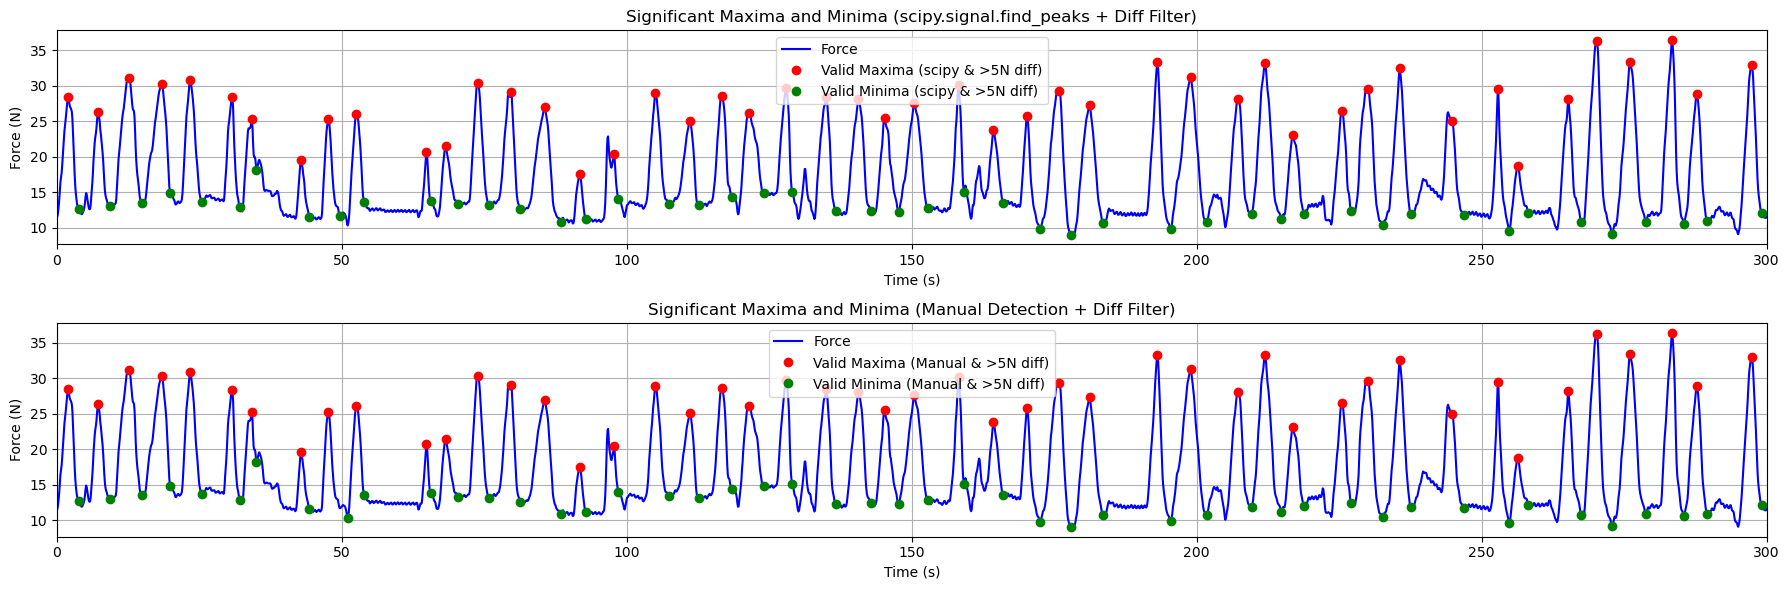

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

df = pd.read_csv(r'datasets/chest-belt.csv')

force = df['Force(N)'].values
time = df['Time(s)'].values

fig, axes = plt.subplots(2, 1, figsize=(18, 6))

peaks_scipy, _ = find_peaks(force)
valleys_scipy, _ = find_peaks(-force)

valid_peaks_scipy = []
valid_valleys_scipy = []

for peak in peaks_scipy:
    future_valleys = [v for v in valleys_scipy if v > peak]
    if not future_valleys:
        continue

    next_valley = future_valleys[0]
    force_diff = force[peak] - force[next_valley]

    if force_diff > 5:
        valid_peaks_scipy.append(peak)
        valid_valleys_scipy.append(next_valley)

axes[0].plot(time, force, label='Force', color='blue')
axes[0].plot(time[valid_peaks_scipy], force[valid_peaks_scipy], "ro", label='Valid Maxima (scipy & >5N diff)')
axes[0].plot(time[valid_valleys_scipy], force[valid_valleys_scipy], "go", label='Valid Minima (scipy & >5N diff)')
axes[0].set_title('Significant Maxima and Minima (scipy.signal.find_peaks + Diff Filter)')
axes[0].set_xlabel('Time (s)')
axes[0].set_xlim(0, 300)
axes[0].set_ylabel('Force (N)')
axes[0].legend()
axes[0].grid(True)

maxima_manual = []
minima_manual = []

for i, j in enumerate(force):
    if i == 0 or i == len(force)-1:
        continue
    if j > force[i-1] and j > force[i+1]:
        maxima_manual.append(i)

for i, j in enumerate(force):
    if i == 0 or i == len(force)-1:
        continue
    if j < force[i-1] and j < force[i+1]:
        minima_manual.append(i)

valid_maximas_manual, valid_minimas_manual = [], []

for peak in maxima_manual:
    future_valleys = [v for v in minima_manual if v > peak]

    if not future_valleys:
        continue

    next_valley = future_valleys[0]
    force_diff = force[peak] - force[next_valley]

    if force_diff > 5:
        valid_maximas_manual.append(peak)
        valid_minimas_manual.append(next_valley)

axes[1].plot(time, force, label='Force', color='blue')
axes[1].plot(time[valid_maximas_manual], force[valid_maximas_manual], "ro", label='Valid Maxima (Manual & >5N diff)')
axes[1].plot(time[valid_minimas_manual], force[valid_minimas_manual], "go", label='Valid Minima (Manual & >5N diff)')
axes[1].set_title('Significant Maxima and Minima (Manual Detection + Diff Filter)')
axes[1].set_xlabel('Time (s)')
axes[1].set_xlim(0, 300)
axes[1].set_ylabel('Force (N)')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()